<a href="https://colab.research.google.com/github/Juanchi0207/SoporteInf6to/blob/main/Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv("/content/storms.csv", sep = ";")
csvColumnas = list(csv.columns)

In [3]:
csv = csv[csv['category'].notna()]

In [4]:
csv['hour'] = csv['hour'].apply(lambda x: str(x) + ':00')

In [5]:
csv.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
csv.index = np.arange(1, len(csv) + 1)

**El csv muestra datos sobre huracanes en los ultimos 50 años**

In [7]:
csv

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
1,Blanche,1975,7,27,6:00,"35,9",-70,hurricane,1.0,65,987,NaN,NaN
2,Blanche,1975,7,27,12:00,"36,9",-69,hurricane,1.0,70,984,NaN,NaN
3,Blanche,1975,7,27,18:00,"37,9",-68,hurricane,1.0,75,981,NaN,NaN
4,Blanche,1975,7,28,0:00,"39,3","-67,2",hurricane,1.0,75,980,NaN,NaN
5,Blanche,1975,7,28,6:00,"41,2","-66,4",hurricane,1.0,70,980,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Sam,2021,10,4,0:00,"38,7","-52,2",hurricane,2.0,90,957,420.0,100.0
4681,Sam,2021,10,4,6:00,"39,9","-49,9",hurricane,2.0,90,957,440.0,60.0
4682,Sam,2021,10,4,12:00,"41,4","-47,1",hurricane,2.0,85,960,440.0,60.0
4683,Sam,2021,10,4,18:00,"43,8","-43,6",hurricane,1.0,80,965,500.0,70.0


Grafico que muestra la cantidad de huracanes por año en el periodo del 2000 en adelante

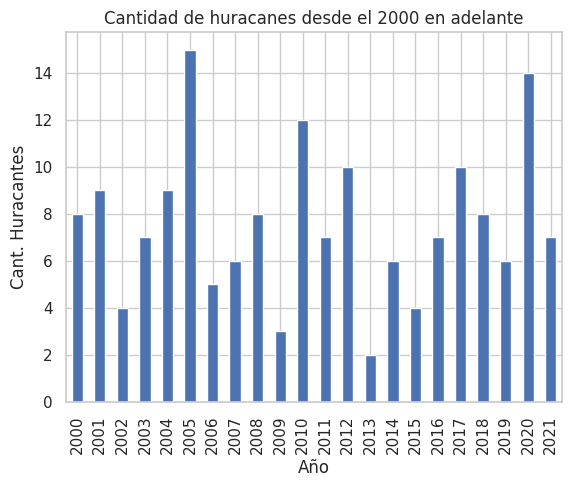

In [31]:
# Mostrar desde el 2000 en adelante
csv_filtered = csv[csv['year'] >= 2000]

# agrupar por año y contar cantidad por año
csv_grouped = csv_filtered.groupby('year')['name'].nunique()

# Grafico
csv_grouped.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cant. Huracantes')
plt.title('Cantidad de huracanes desde el 2000 en adelante')
plt.show()


Grafico que muestra el porcentaje de huracanes que llegan a que categoria (teniendo en cuenta que los huracanes suben de categoria, por ende guardamos solo la maxima)

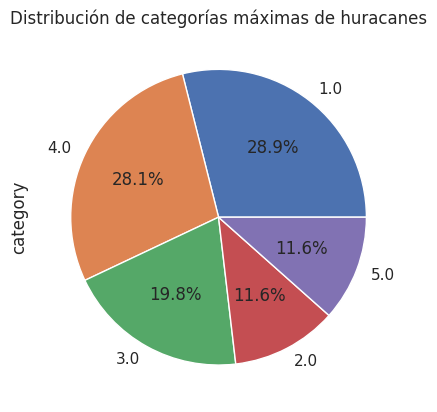

Cant. huracanes total: 173


In [64]:
max_category = csv_filtered.groupby('name')['category'].max()
max_category.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de categorías máximas de huracanes')
plt.show()
print('Cant. huracanes total:', csv['name'].nunique())


Grafico el cual muestra como el viento cambia a lo largo de un huracan especifico

<ipython-input-81-dcf9d4d38d9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_sam['datetime'] = pd.to_datetime(csv_sam['year'].astype(str) + '-' + csv_sam['month'].astype(str) + '-' + csv_sam['day'].astype(str) + ' ' + csv_sam['hour'])


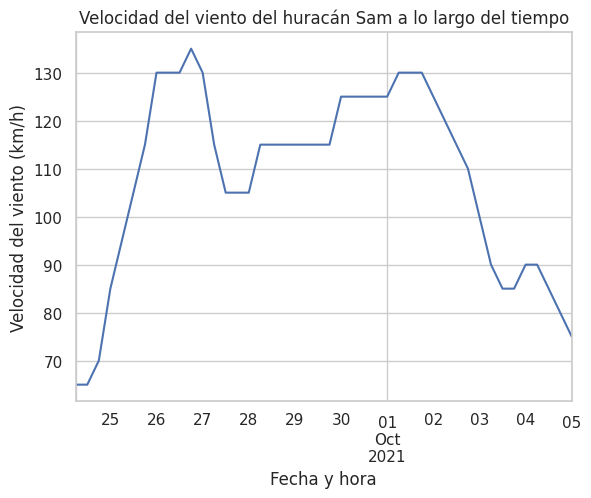

In [81]:
# Filtrar por el huracán Sam
csv_sam = csv_filtered[csv_filtered['name'] == 'Sam']

# Crear una nueva columna con la fecha y hora combinadas
csv_sam['datetime'] = pd.to_datetime(csv_sam['year'].astype(str) + '-' + csv_sam['month'].astype(str) + '-' + csv_sam['day'].astype(str) + ' ' + csv_sam['hour'])

# Agrupar por fecha y hora y calcular la velocidad máxima del viento
csv_sam_grouped = csv_sam.groupby('datetime')['wind'].max()

# Graficar la velocidad del viento a lo largo del tiempo
csv_sam_grouped.plot(kind='line')
plt.xlabel('Fecha y hora')
plt.ylabel('Velocidad del viento (km/h)')
plt.title('Velocidad del viento del huracán Sam a lo largo del tiempo')
plt.show()
